In [14]:
from liberty.parser import parse_liberty
from pathlib import Path
import re

import matplotlib.pyplot as plt
import numpy as np



In [15]:
pathlist    = Path("./results/").rglob('*.lib')

vdds        = []

cell_rises          = []
rise_transitions    = []

cell_falls          = []
fall_transitions    = []

for path in pathlist:
    # because path is object not string
    path_in_str = str(path)

    pattern = r"\dV\d+"

    vdd     = re.search(pattern, path_in_str).group().replace("V",".")

    # Read and parse a library.
    library = parse_liberty(open("./" + path_in_str).read())

    try:

        rise_value      = float(str(library.get_groups('cell')[0].get_groups('pin')[1].get_groups('timing')[0].get_groups('cell_rise')[0]['values'][0]).replace('"',''))
        rise_transition = float(str(library.get_groups('cell')[0].get_groups('pin')[1].get_groups('timing')[0].get_groups('rise_transition')[0]['values'][0]).replace('"',''))

        fall_value      = float(str(library.get_groups('cell')[0].get_groups('pin')[1].get_groups('timing')[0].get_groups('cell_fall')[0]['values'][0]).replace('"',''))
        fall_transition = float(str(library.get_groups('cell')[0].get_groups('pin')[1].get_groups('timing')[0].get_groups('fall_transition')[0]['values'][0]).replace('"',''))


    except:

        print(f"No Characterization data for {path_in_str}")

    else:

        #print(vdd, rise_value)

        vdds.append(vdd)

        cell_rises.append(rise_value)
        rise_transitions.append(rise_transition)

        cell_falls.append(fall_value)
        fall_transitions.append(fall_transition)


No Characterization data for results/sky130_fd_sc_lp_0V5.lib
No Characterization data for results/sky130_fd_sc_lp_0V55.lib


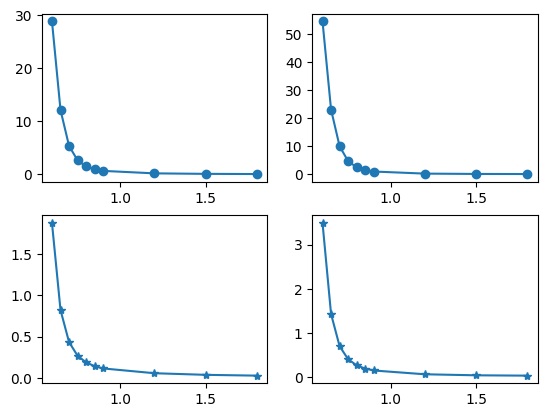

In [16]:
fig, _axs = plt.subplots(nrows = 2, ncols = 2)

axs = _axs.flatten()

axs[0].plot(np.array(vdds, dtype=np.float32), np.array(cell_rises, dtype=np.float32), marker='o')
axs[1].plot(np.array(vdds, dtype=np.float32), np.array(rise_transitions, dtype=np.float32), marker='o')

axs[2].plot(np.array(vdds, dtype=np.float32), np.array(cell_falls, dtype=np.float32), marker='*')
axs[3].plot(np.array(vdds, dtype=np.float32), np.array(fall_transitions, dtype=np.float32), marker='*')
